In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

profile_telecom = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/profile_telecom.csv')
profile_telecom.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1


In [2]:
profile_telecom.iloc[:,1:].corr()

,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


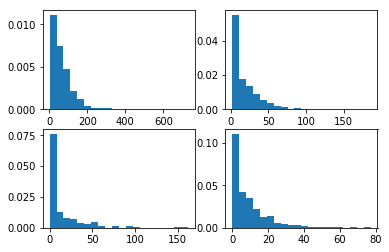

In [3]:
for i in range(4):
    plt.subplot(221+i)
    plt.hist(profile_telecom.iloc[:,i+1],bins=20,normed=True)

使用原始变量进行聚类——用于发现离群点

仅使用学生标准化进行预处理，不使用其它会改变数据分布形态的变换

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scale_x = StandardScaler().fit_transform(profile_telecom.iloc[:,1:])
km = KMeans(n_clusters=4,n_init=15)
km.fit(scale_x)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
from sklearn import metrics

print(metrics.silhouette_score(scale_x,km.labels_))

0.4532054114828762


In [ ]:
　　　　1）n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数。当然，我们还可以将参数设置为"mle", 此时PCA类会用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。我们也可以用默认值，即不输入n_components，此时n_components=min(样本数，特征数)。

　　　　2）whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。

　　　　3）svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scale_pca = pca.fit_transform(scale_x)
km.fit(scale_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
print(metrics.silhouette_score(scale_pca,km.labels_))

0.5149308337032366


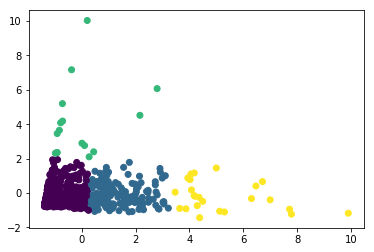

In [18]:
pca_ = pd.DataFrame(scale_pca,columns=['A','B'])
pca_['labels'] = km.labels_
plt.scatter(pca_['A'],pca_.B,c=pca_.labels)

In [20]:
pca_.groupby('labels')[['A','B']].count()

,A,B
labels,,
0,406,406
1,154,154
2,16,16
3,24,24


取对数后聚类

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


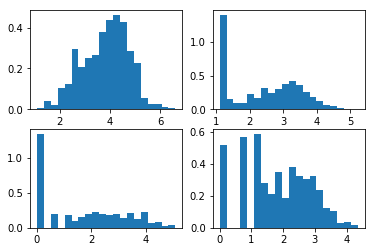

In [21]:
ln_x = np.log1p(profile_telecom.iloc[:,1:])
for i in range(4):
    plt.subplot(221+i)
    plt.hist(ln_x.iloc[:,i],bins=20,normed=True)

In [22]:
km = KMeans(n_clusters=3,n_init=15)
stand_ln_x = StandardScaler().fit_transform(ln_x)
stand_ln_pca = pca.fit_transform(stand_ln_x)
km.fit(stand_ln_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
print(metrics.silhouette_score(stand_ln_pca,km.labels_))

0.47285238364613247


In [24]:
pd.DataFrame(stand_ln_pca).groupby(km.labels_).count()

,0,1
0,154,154
1,312,312
2,134,134


解释模型——使用原始数据

In [27]:
kk = profile_telecom.iloc[:,1:].groupby(km.labels_).mean()
kk

,cnt_call,cnt_msg,cnt_wei,cnt_web
0,99.707792,4.324675,0.876623,1.766234
1,70.708333,30.153846,27.826923,15.538462
2,14.477612,4.335821,0.507463,1.552239


([<matplotlib.axis.XTick at 0x20eae794c18>,
 <a list of 4 Text xticklabel objects>)

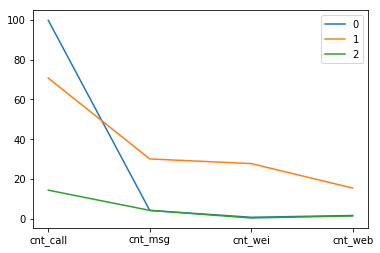

In [42]:
kk.T.plot()
plt.xticks([0,1,2,3],['cnt_call','cnt_msg','cnt_wei','cnt_web'])

选择K值——使用样本到类中心的距离和(离差平方和)以及轮廓系数

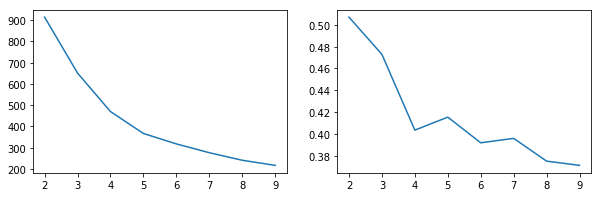

In [47]:
ks = range(2,10)
r=[];s=[]
for i in ks:
    km = KMeans(n_clusters=i,n_init=15)
    km.fit_transform(stand_ln_pca)
    r.append(km.inertia_)
    s.append(metrics.silhouette_score(stand_ln_pca,km.labels_))
plt.figure(figsize=(10,3))
plt.subplot(121); plt.plot(ks, r)
plt.subplot(122); plt.plot(ks, s)